In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
from matplotlib.pyplot import figure, text
import math

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [29]:
raw = pd.read_excel('./data/다시최종_경남2.xlsx')
raw = raw[raw['거래금액'] > 0]
raw['사업분야'].value_counts()

1.IT제조     400
3.SW       101
2.IT서비스     20
Name: 사업분야, dtype: int64

In [30]:
raw = raw[raw['사업분야'] == '1.IT제조']
selected = [k for k,v in zip(Counter(raw['업체명'].tolist() + raw['거래처명'].tolist()).keys(), Counter(raw['업체명'].tolist() + raw['거래처명'].tolist()).values()) if v > 0]
raw

,업체명,업체명_사업분야,사업자등록번호_x,거래처명,거래처등록번호,거래금액,거래구분,도로명주소,업종코드10차,기업규모,기업유형,시도,시군구,사업자등록번호_y,사업분야,업종(10차),사업체규모
0,동성전기,1.IT제조,6228106986,에스티엑스엔진(주),6098162781,2793474,판매처,경남 창원시 성산구 공단로474번길 36(성산동),C29111,중견기업,법인기업,경남,창원시 성산구,6098162781,1.IT제조,30332,중소기업
1,신승전기,1.IT제조,6088132891,에스티엑스엔진(주),6098162781,708547,판매처,경남 창원시 성산구 공단로474번길 36(성산동),C29111,중견기업,법인기업,경남,창원시 성산구,6098162781,1.IT제조,30332,중소기업
2,신승전기,1.IT제조,6088132891,에스티엑스엔진(주),6098162781,431054,판매처,경남 창원시 성산구 공단로474번길 36(성산동),C29111,중견기업,법인기업,경남,창원시 성산구,6098162781,1.IT제조,30332,중소기업
3,포스텍,3.SW,6098123911,에스티엑스엔진(주),6098162781,4605418,판매처,경남 창원시 성산구 공단로474번길 36(성산동),C29111,중견기업,법인기업,경남,창원시 성산구,6098162781,1.IT제조,30332,중소기업
4,청양지피엠,1.IT제조,6098191646,에스티엑스엔진(주),6098162781,935497,판매처,경남 창원시 성산구 공단로474번길 36(성산동),C29111,중견기업,법인기업,경남,창원시 성산구,6098162781,1.IT제조,30332,중소기업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,아이비에스티,1.IT제조,2198800029,(주)케이엔엘이디,3988100338,2000,판매처,"경남 창원시 마산회원구 봉암북7길 21, 4동 704호 (봉암동,경남테크노파크)",C28423,소상공인,법인기업,경남,창원시 마산회원구,3988100338,1.IT제조,26211,중소기업
513,오에스랩,3.SW,1728100022,(주)유민텍,1938100863,66545,판매처,"경남 창원시 마산회원구 봉암북7길 21 주동 (봉암동, 지능형홈산업화센터-기업입 3...",C28123,소상공인,법인기업,경남,창원시 마산회원구,1938100863,1.IT제조,26299,중소기업
514,디앤에이치텍,1.IT제조,8528100088,(주)이비스마트,2128614381,48000,판매처,"경남 창원시 의창구 팔용로371번길 36, 3층 (팔용동)",C28519,소기업,법인기업,경남,창원시 의창구,2128614381,1.IT제조,26299,중소기업
516,대양기전,1.IT제조,8248100628,윈윈전기(주),6068174745,2525,판매처,경남 김해시 주촌면 골든루트로 158-33 (망덕리),C28902,소상공인,법인기업,경남,김해시,6068174745,1.IT제조,26129,중소기업


In [31]:
temp = raw[raw['거래구분'] == '판매처']
cnt = [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

temp = raw[raw['거래구분'] == '구매처']
cnt = cnt + [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = w + temp['거래금액'].tolist()

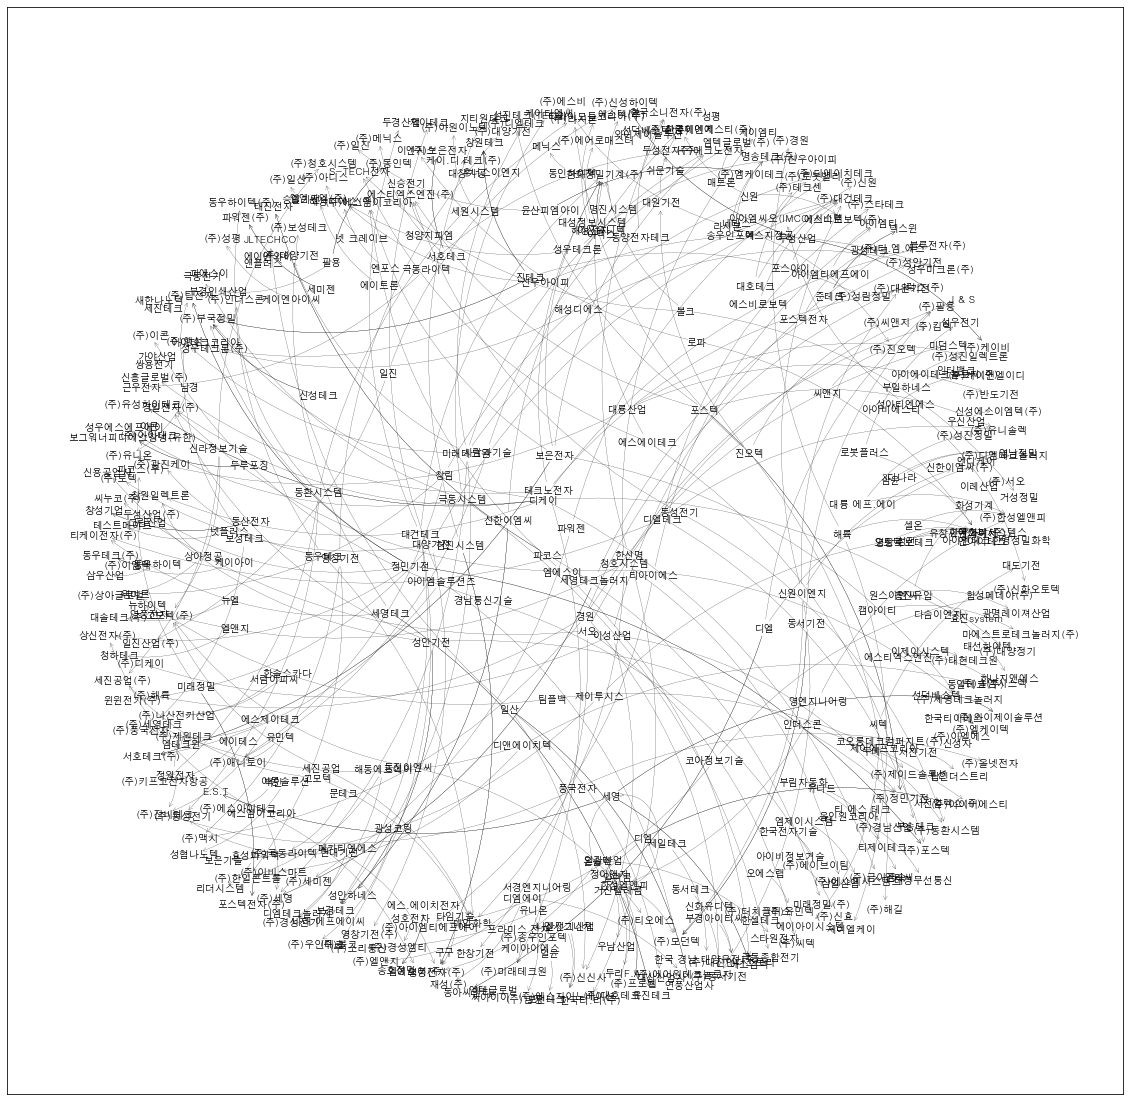

In [15]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [32]:
temp = raw[raw['거래구분'] == '판매처']
cnt = [(a,b) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

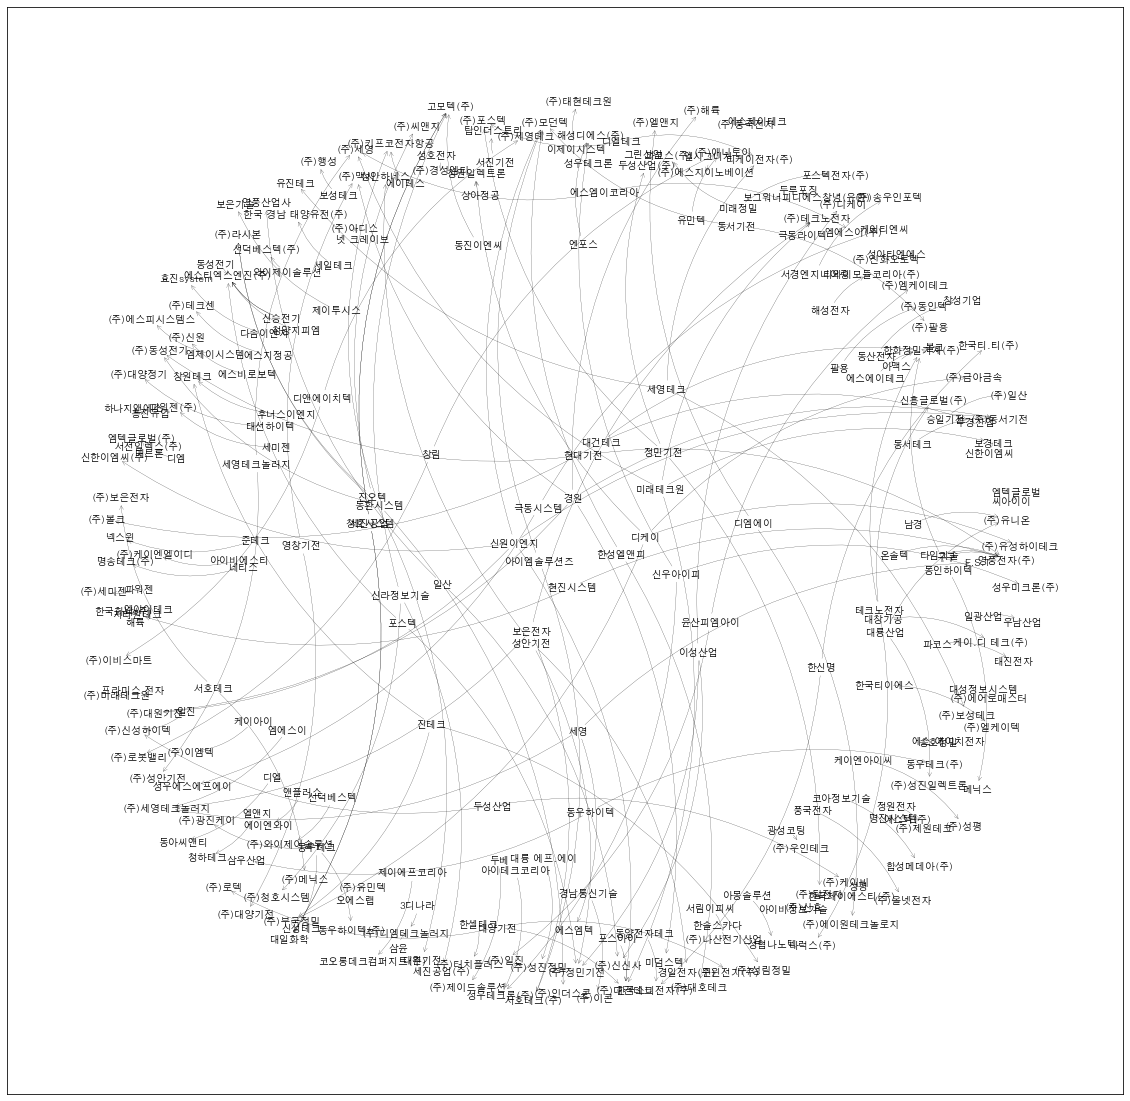

In [17]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [33]:
temp = raw[raw['거래구분'] == '구매처']
cnt = [(b,a) for a, b in zip(temp['업체명'], temp['거래처명']) if (a in selected) & (b in selected)]
w = temp['거래금액'].tolist()

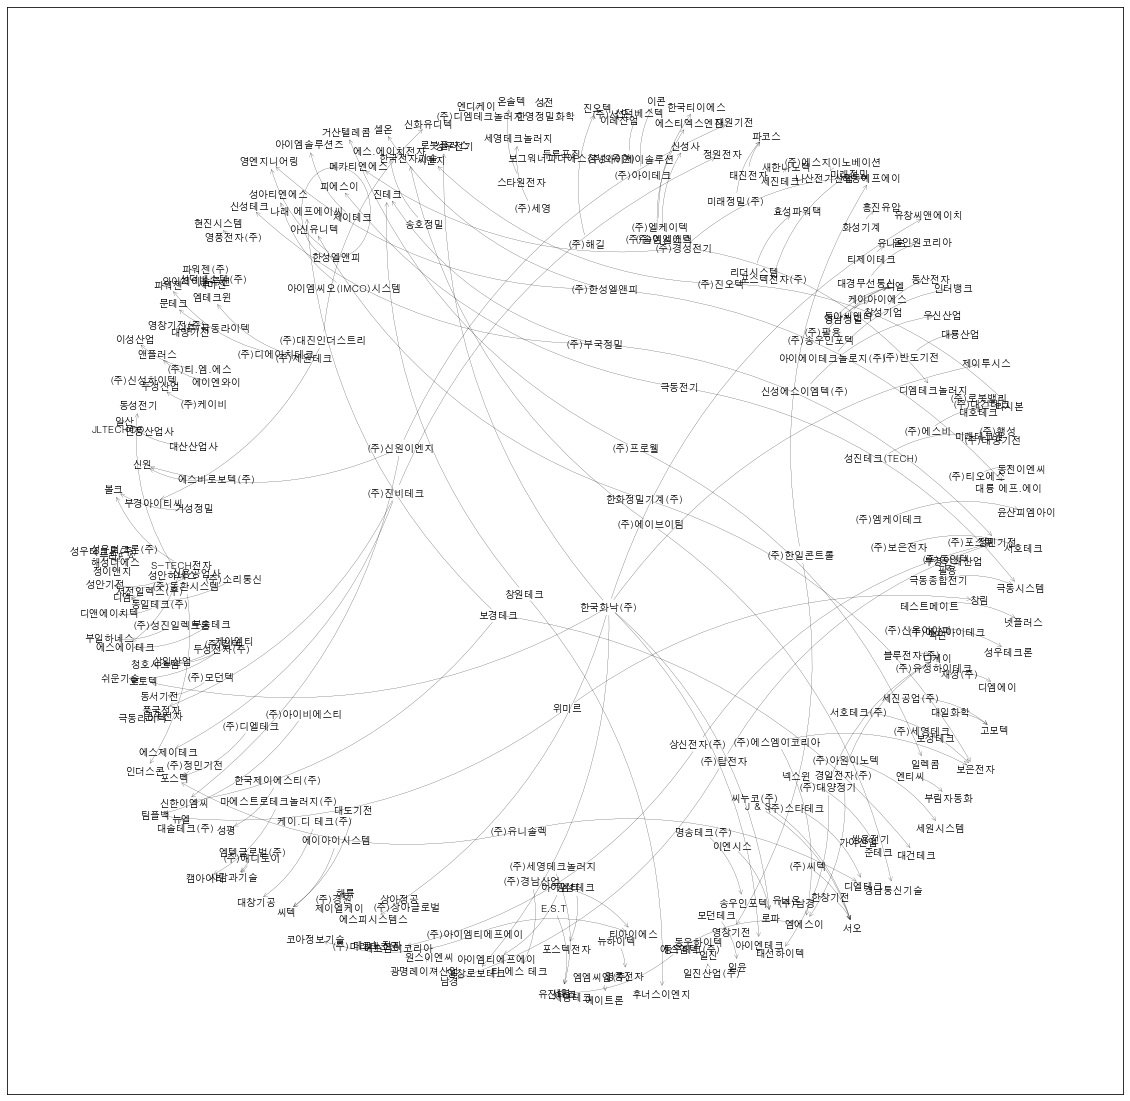

In [19]:
plt.figure(figsize = (20,20))

G = nx.DiGraph()

G.add_edges_from(cnt,relation='cnt')

pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
relation = nx.get_edge_attributes(G, 'relation')

#nx.draw(G,pos, with_labels=True, edge_color='white')
nx.draw_networkx_edges(G,pos, edgelist=cnt, connectionstyle='arc3, rad = -0.2', arrowstyle='->', width = 0.2)
nx.draw_networkx_labels(G,pos,font_family=font,font_size=10)
plt.show()

In [34]:
temp = raw[raw['거래구분'] == '구매처']
top5 = temp.groupby(['업체명']).sum()['거래금액'].sort_values(ascending = False).index[:5]

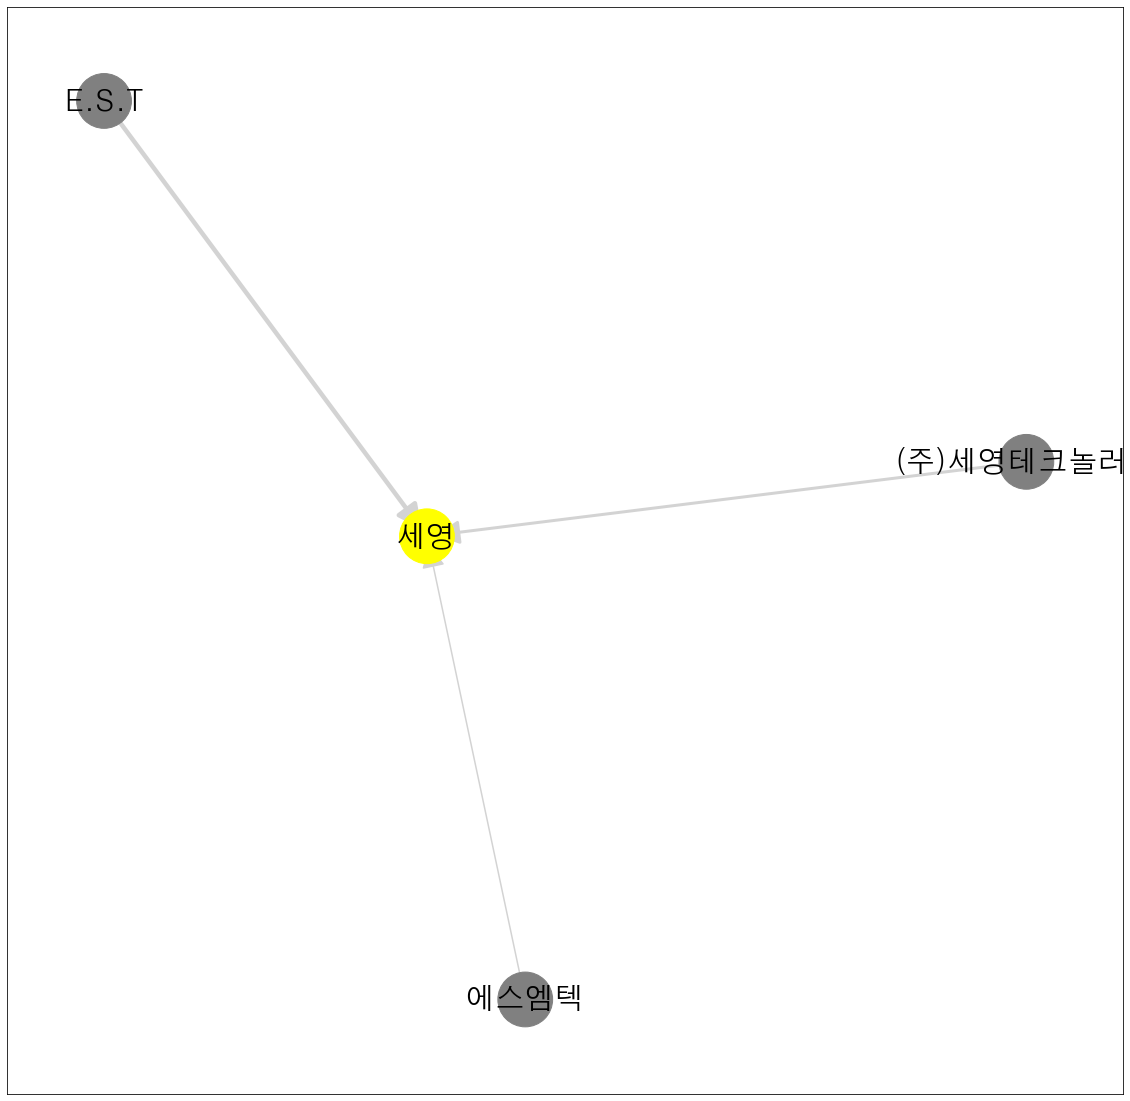

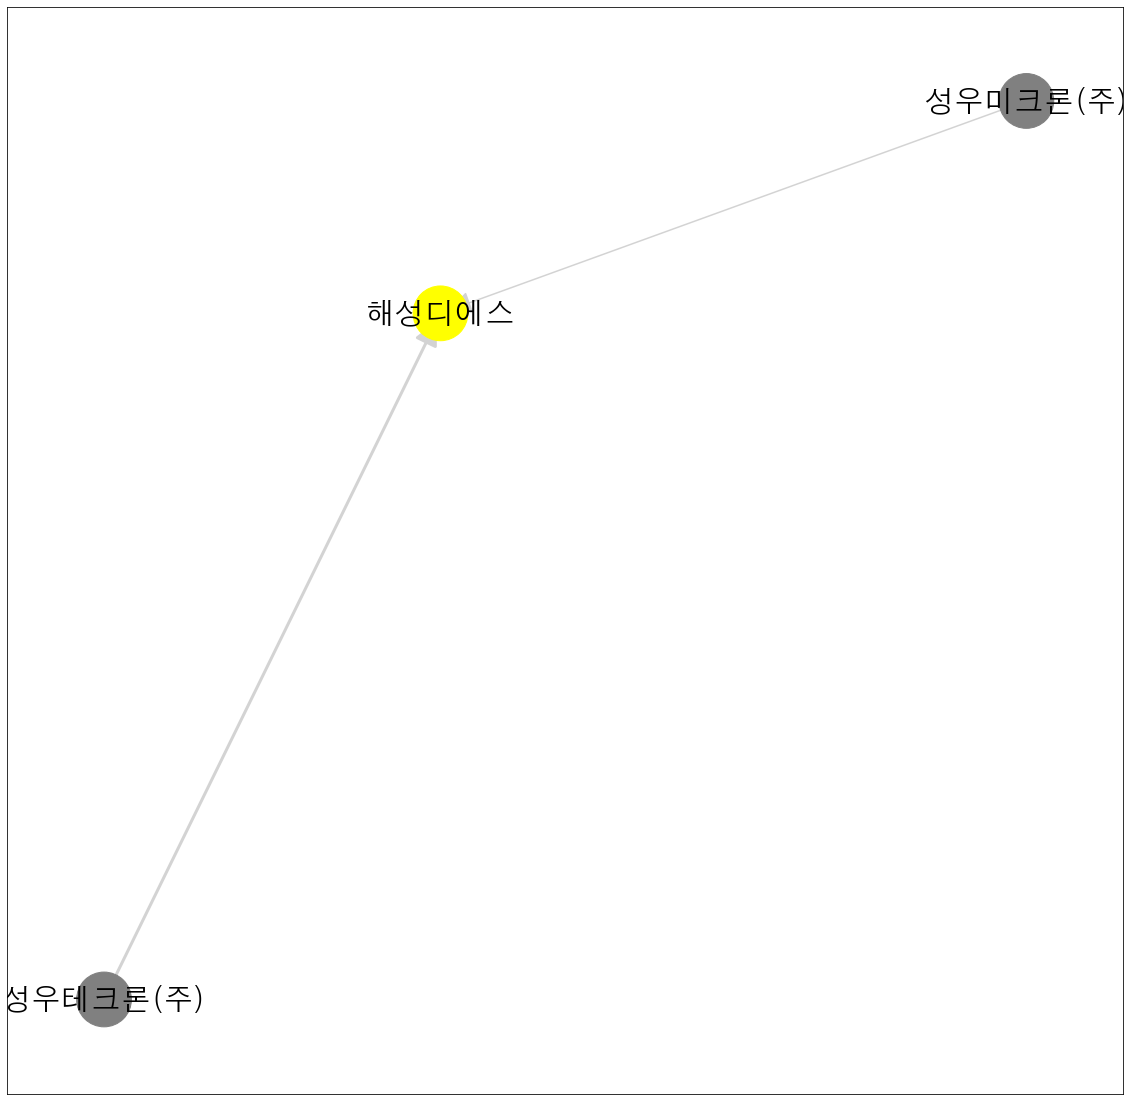

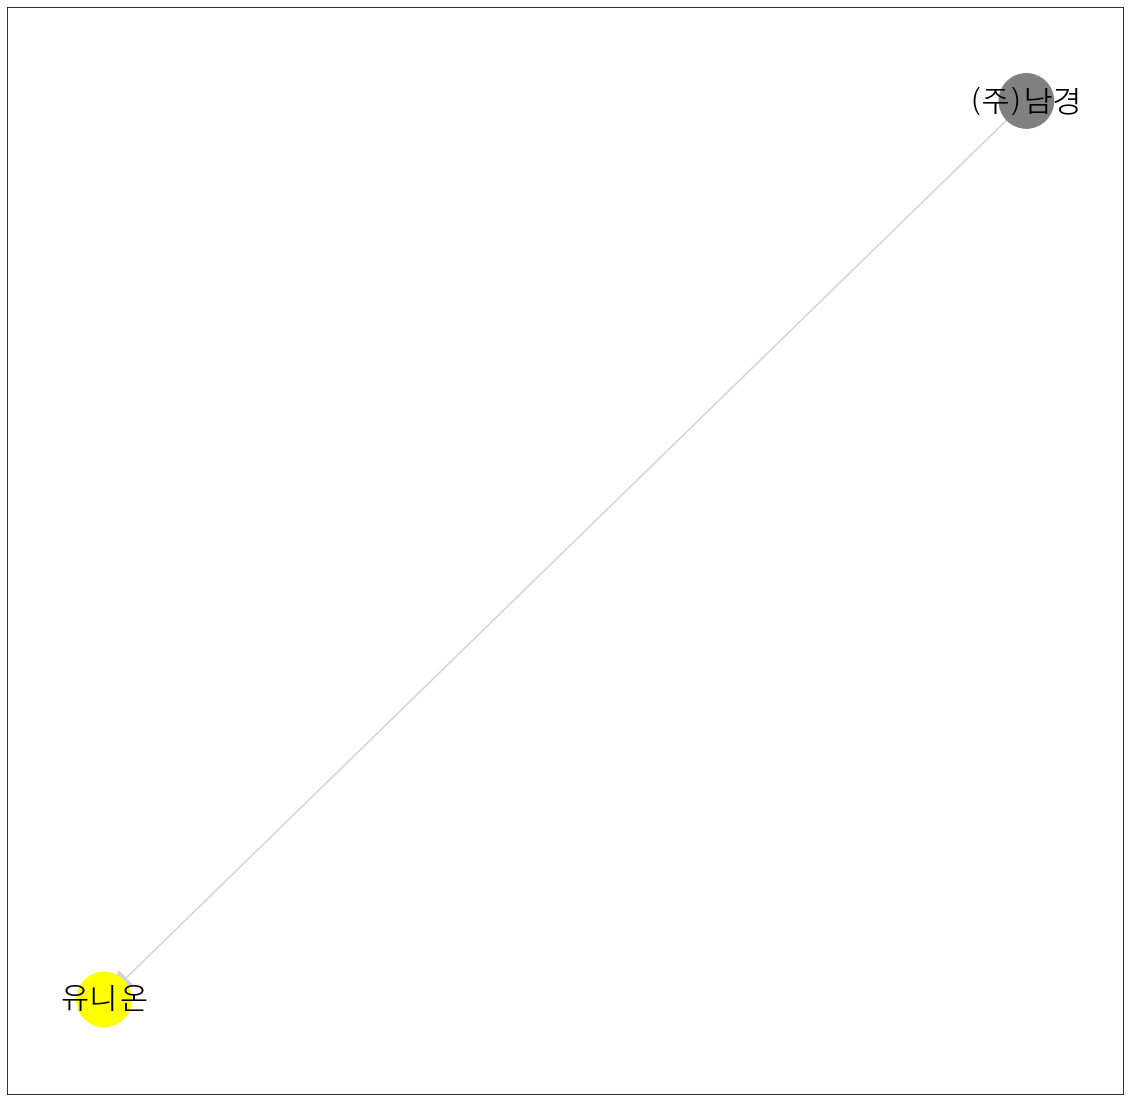

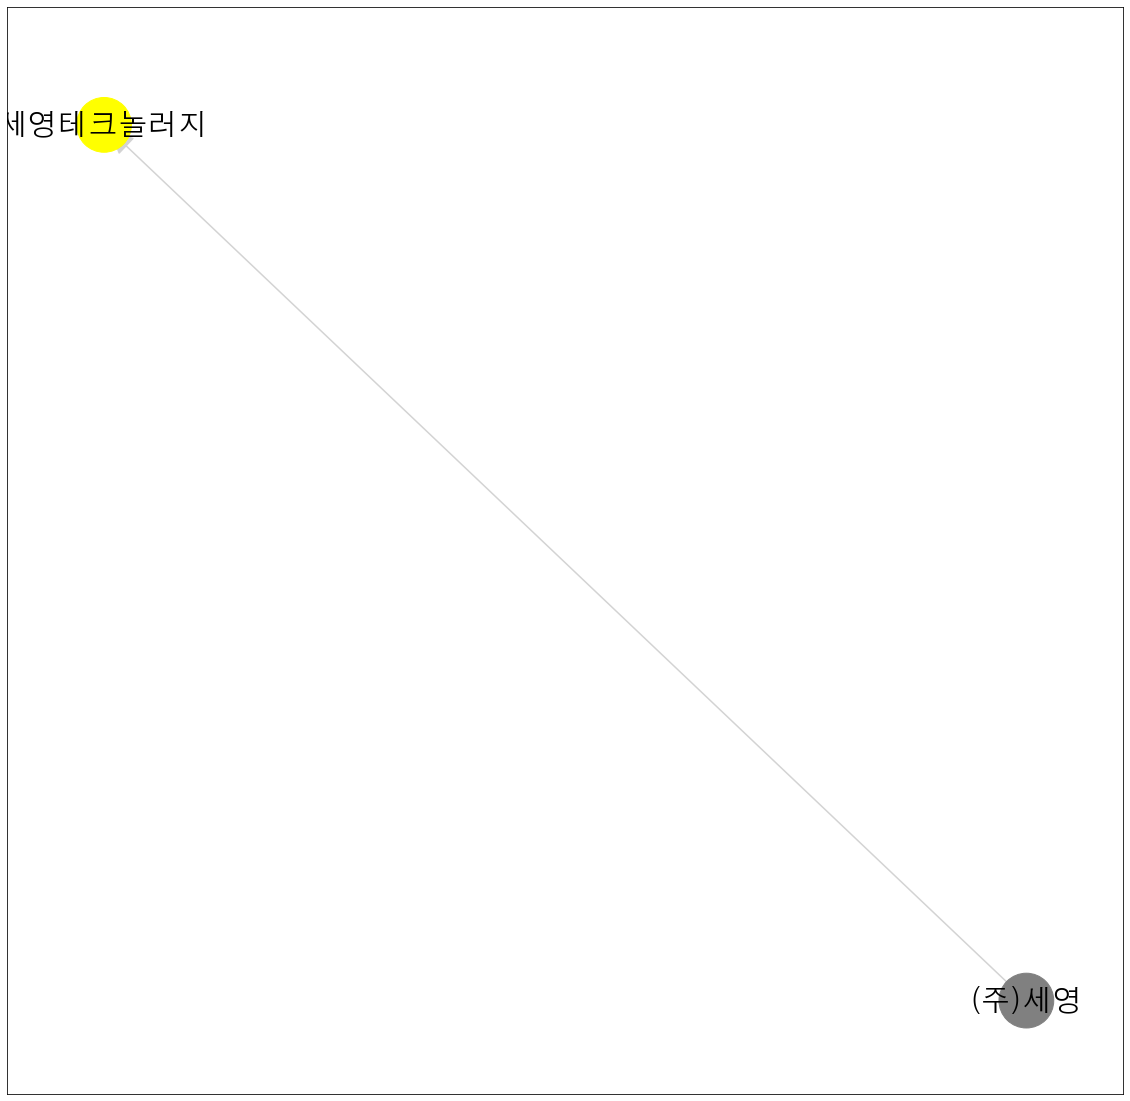

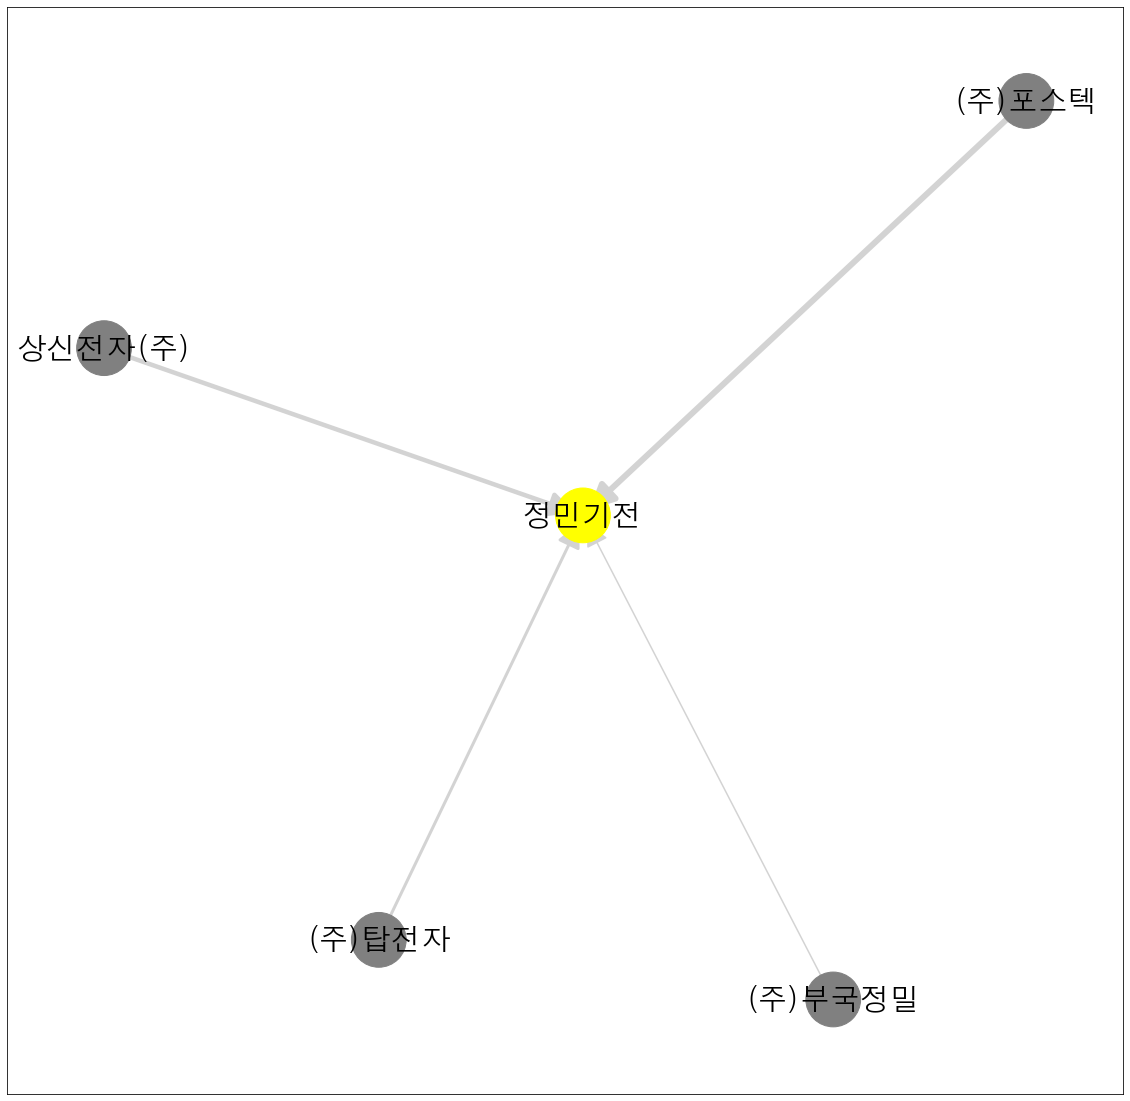

In [35]:
for f in top5:
    temp2 = temp[temp['업체명'] == f]
    cnt = [(b,a) for a, b in zip(temp2['업체명'], temp2['거래처명'])]
    w = temp2['거래금액'].tolist()
    w = [(sorted(w).index(i)+1)*1.5 for i in w]

    plt.figure(figsize = (20,20))

    G = nx.DiGraph()

    G.add_edges_from(cnt,relation='cnt')

    pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
    pos[f] = np.array([0,0])
    relation = nx.get_edge_attributes(G, 'relation')

    #nx.draw(G,pos, with_labels=True, edge_color='white')
    nx.draw_networkx_nodes(G,pos, node_size=3000, node_color=['yellow' if i == f else 'gray' for i in pos.keys()])
    nx.draw_networkx_edges(G,pos, edgelist=cnt, arrowstyle='-|>', arrowsize = 50, width = w, edge_color='lightgray')
    nx.draw_networkx_labels(G,pos,font_family=font,font_size=30)
    plt.show()

In [36]:
temp = raw[raw['거래구분'] == '판매처']
top5 = temp.groupby(['업체명']).sum()['거래금액'].sort_values(ascending = False).index[:5]

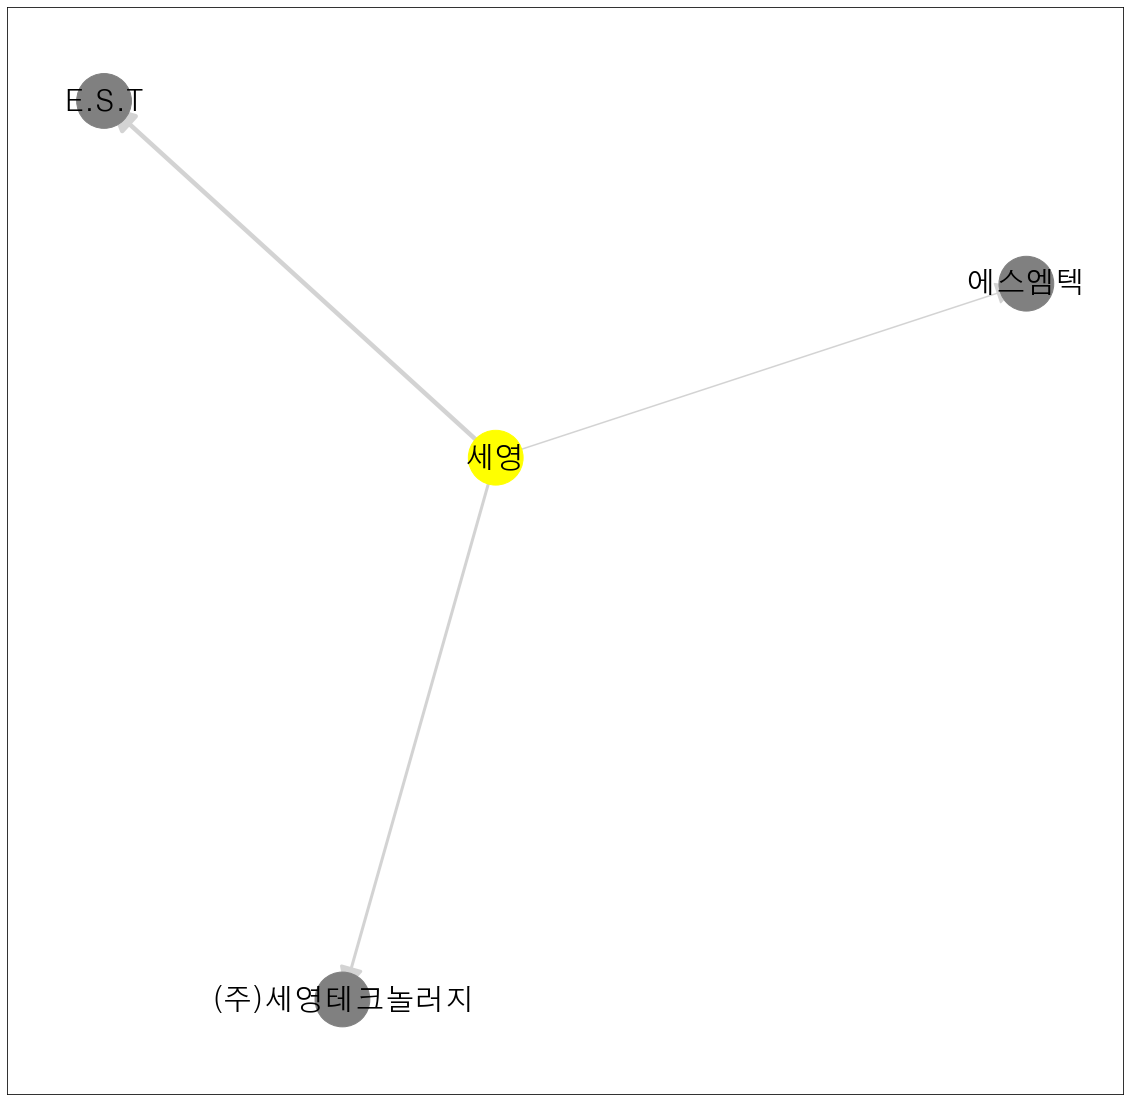

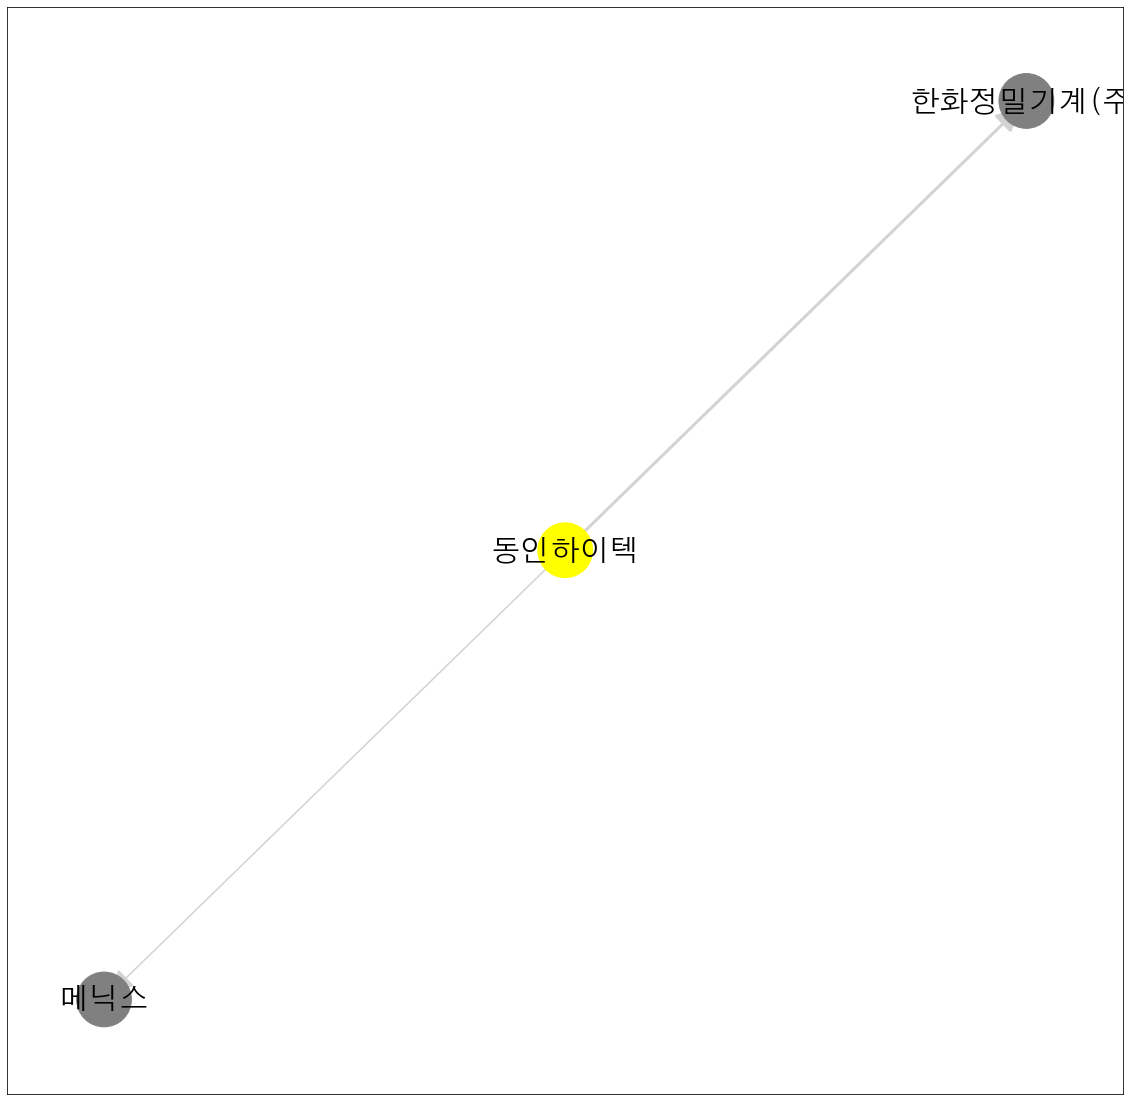

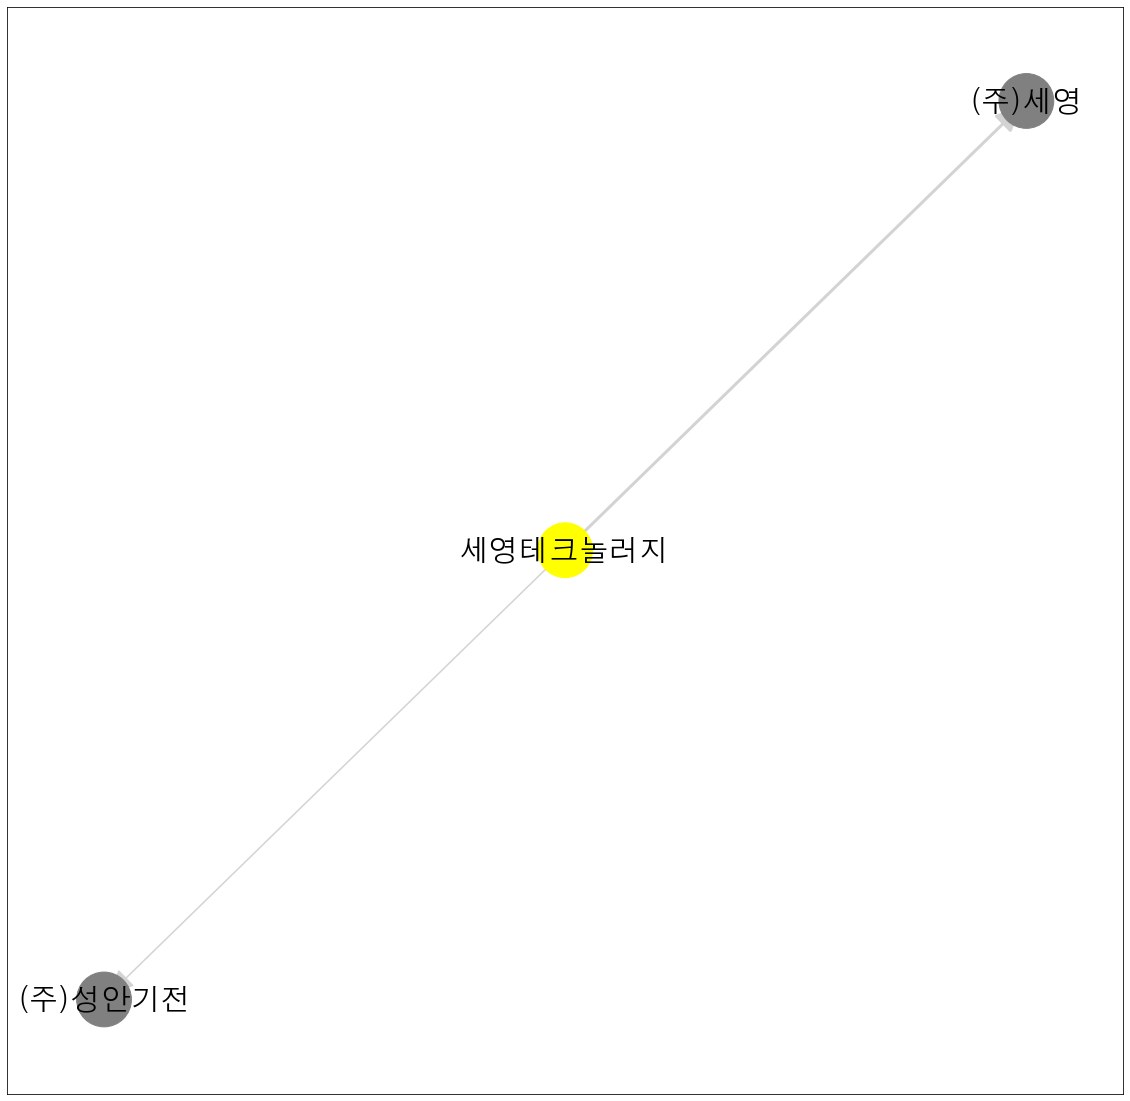

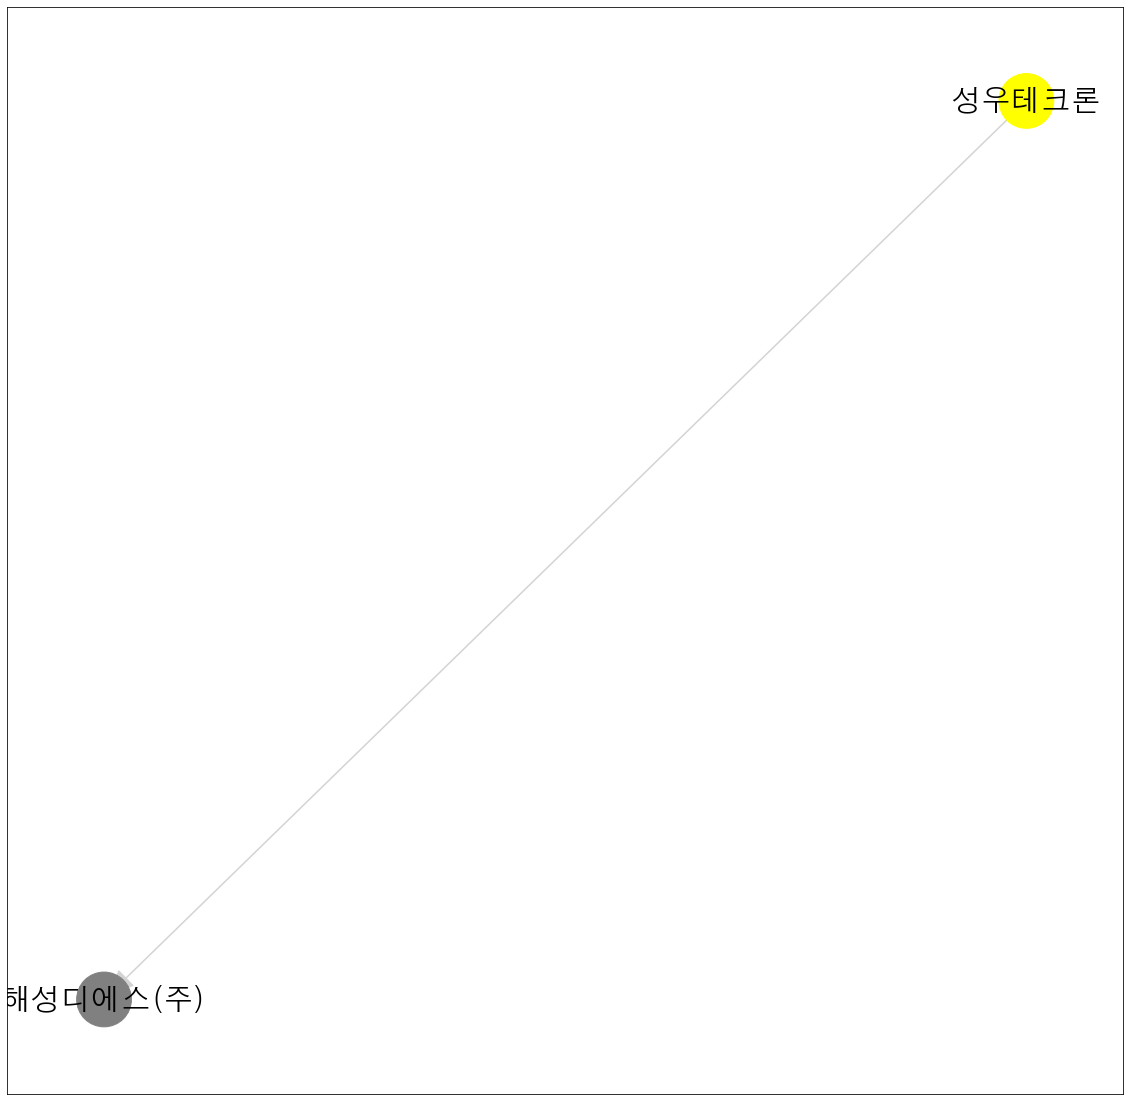

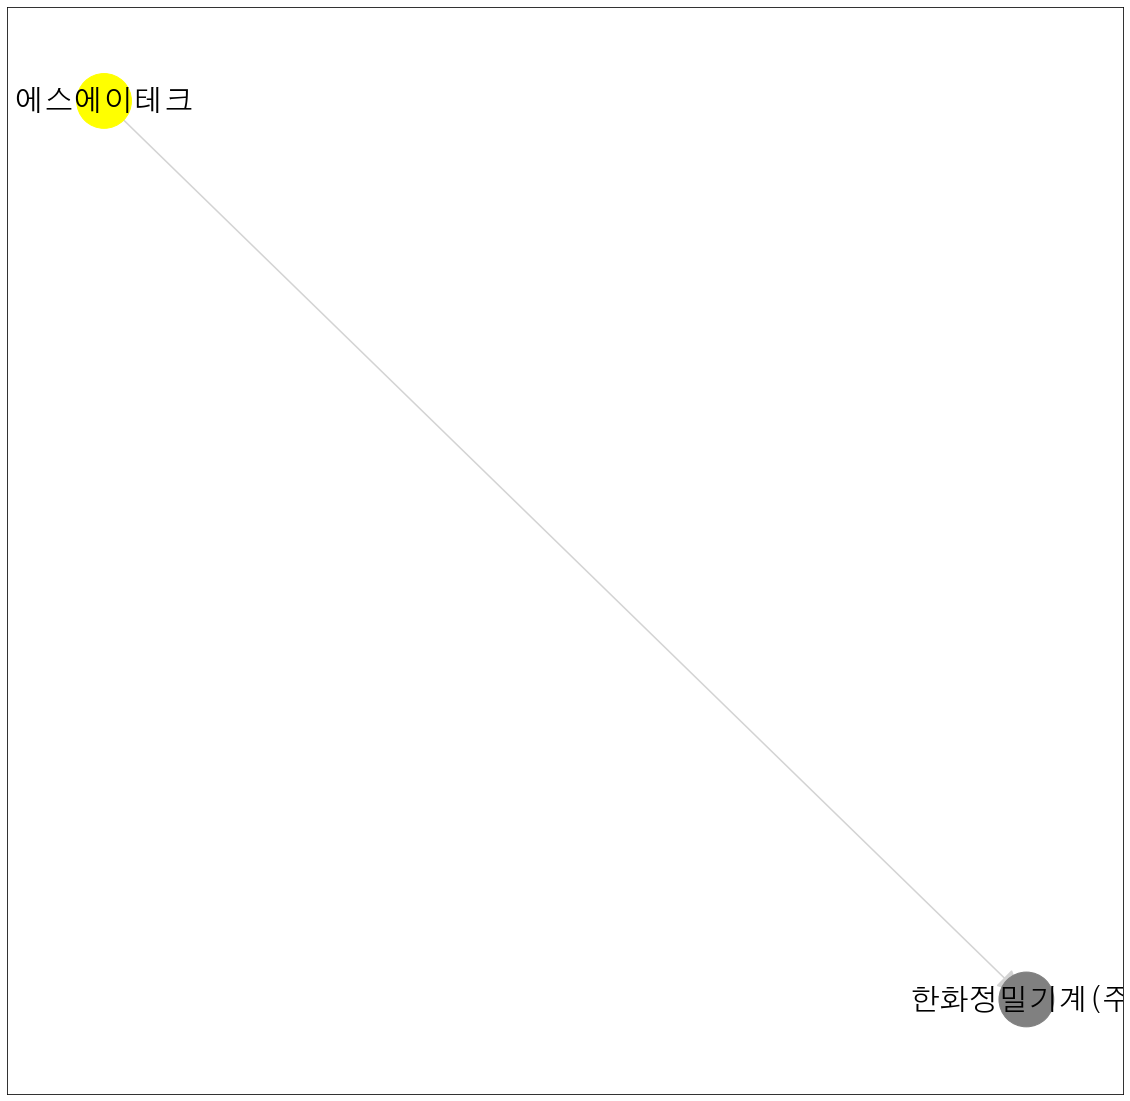

In [44]:
for f in top5:
    temp2 = temp[temp['업체명'] == f]
    cnt = [(a,b) for a, b in zip(temp2['업체명'], temp2['거래처명'])]
    w = temp2['거래금액'].tolist()
    w = [(sorted(w).index(i)+1)*1.5 for i in w]

    plt.figure(figsize = (20,20))

    G = nx.DiGraph()

    G.add_edges_from(cnt,relation='cnt')

    pos=nx.spring_layout(G) # 각 노드, 엣지를 draw하기 위한 position 정보
    pos[f] = np.array([0,0])
    relation = nx.get_edge_attributes(G, 'relation')

    #nx.draw(G,pos, with_labels=True, edge_color='white')
    nx.draw_networkx_nodes(G,pos, node_size=3000, node_color=['yellow' if i == f else 'gray' for i in pos.keys()])
    nx.draw_networkx_edges(G,pos, edgelist=cnt, arrowstyle='-|>', arrowsize = 50, width = w, edge_color='lightgray')
    nx.draw_networkx_labels(G,pos,font_family=font,font_size=30)
    plt.show()